In [69]:
import pandas as pd
import numpy as np

In [70]:
int = pd.read_csv("Interior.csv")

In [71]:
int.head()

,room_id,room_type,room_size,num_windows,ceiling_height,wall_color,flooring_type,furniture_style,lighting_quality,decor_budget,overall_design_score
0,1,Living Room,250,4,9,Beige,Hardwood,Modern,4,5000,4.2
1,2,Bedroom,180,2,8,Light Blue,Carpet,Traditional,3,3000,3.8
2,3,Kitchen,300,3,10,White,Tile,Contemporary,5,7500,4.5
3,4,Dining Room,150,2,9,Gray,Hardwood,Rustic,4,4000,4.1
4,5,Home Office,120,1,8,Navy,Laminate,Industrial,3,2500,3.6


In [72]:
int.columns

Index(['room_id', 'room_type', 'room_size', 'num_windows', 'ceiling_height',
       'wall_color', 'flooring_type', 'furniture_style', 'lighting_quality',
       'decor_budget', 'overall_design_score'],
      dtype='object')

In [73]:
int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               50 non-null     int64  
 1   room_type             50 non-null     object 
 2   room_size             50 non-null     int64  
 3   num_windows           50 non-null     int64  
 4   ceiling_height        50 non-null     int64  
 5   wall_color            50 non-null     object 
 6   flooring_type         50 non-null     object 
 7   furniture_style       50 non-null     object 
 8   lighting_quality      50 non-null     int64  
 9   decor_budget          50 non-null     int64  
 10  overall_design_score  50 non-null     float64
dtypes: float64(1), int64(6), object(4)
memory usage: 4.4+ KB


In [74]:
average_room_size = int.groupby('room_type')['room_size'].mean()
average_room_size


room_type
Bathroom        98.75
Bedroom        211.25
Dining Room    170.00
Home Office    135.00
Kitchen        308.75
Living Room    304.00
Name: room_size, dtype: float64

In [75]:
average_decor_budget = int.groupby('room_type')['decor_budget'].agg(mean = 'mean')
average_decor_budget

,mean
room_type,
Bathroom,3012.50
Bedroom,3856.25
Dining Room,4606.25
Home Office,2756.25
Kitchen,7343.75
Living Room,7600.00


In [76]:
flooring_type_avg = int.groupby('flooring_type')['decor_budget'].agg(mean = 'mean').round(2)
flooring_type_avg

,mean
flooring_type,
Carpet,3856.25
Hardwood,6269.44
Laminate,2756.25
Tile,5178.12


In [77]:
window_budget_avg = int.groupby('num_windows')['decor_budget'].agg(mean = 'mean').round(2)
window_budget_avg

,mean
num_windows,
1,2884.38
2,4321.43
3,6093.75
4,7355.56
5,9000.00


In [78]:
int.groupby('room_type')['num_windows'].agg( mean = 'mean').round()

,mean
room_type,
Bathroom,1.0
Bedroom,2.0
Dining Room,2.0
Home Office,1.0
Kitchen,4.0
Living Room,4.0


In [79]:
int.groupby(['room_type', 'flooring_type', 'furniture_style'])['overall_design_score'].agg(mean = 'mean').round(2)

,,,mean
room_type,flooring_type,furniture_style,
Bathroom,Tile,Minimalist,3.94
Bedroom,Carpet,Traditional,4.11
Dining Room,Hardwood,Rustic,4.28
Home Office,Laminate,Industrial,3.70
Kitchen,Tile,Contemporary,4.58
Living Room,Hardwood,Modern,4.68


In [80]:
int.query('room_type == \'Home Office\'')

,room_id,room_type,room_size,num_windows,ceiling_height,wall_color,flooring_type,furniture_style,lighting_quality,decor_budget,overall_design_score
4,5,Home Office,120,1,8,Navy,Laminate,Industrial,3,2500,3.6
10,11,Home Office,150,1,8,Teal,Laminate,Industrial,3,3000,3.9
16,17,Home Office,100,1,8,Green,Laminate,Industrial,3,2000,3.5
22,23,Home Office,130,1,8,Light Teal,Laminate,Industrial,3,2750,3.8
29,30,Home Office,140,1,8,Light Green,Laminate,Industrial,3,2800,3.7
35,36,Home Office,130,1,8,Teal,Laminate,Industrial,3,2900,3.8
41,42,Home Office,150,1,8,Navy,Laminate,Industrial,3,3100,3.6
47,48,Home Office,160,1,8,Light Teal,Laminate,Industrial,3,3000,3.7


In [81]:
int.groupby(['room_type', 'furniture_style'])['decor_budget'].agg(['max', 'min']).sort_values( by = ['max', 'min'], ascending = [False, True])

,,max,min
room_type,furniture_style,,
Living Room,Modern,10000,5000
Kitchen,Contemporary,8000,6500
Dining Room,Rustic,5000,4000
Bedroom,Traditional,4500,3000
Bathroom,Minimalist,3300,2500
Home Office,Industrial,3100,2000


In [91]:
new_interior = int.select_dtypes(exclude = 'object').drop(columns = 'room_id')


Text(0.5, 1.0, 'Correlation Heatmap of Interior Features')

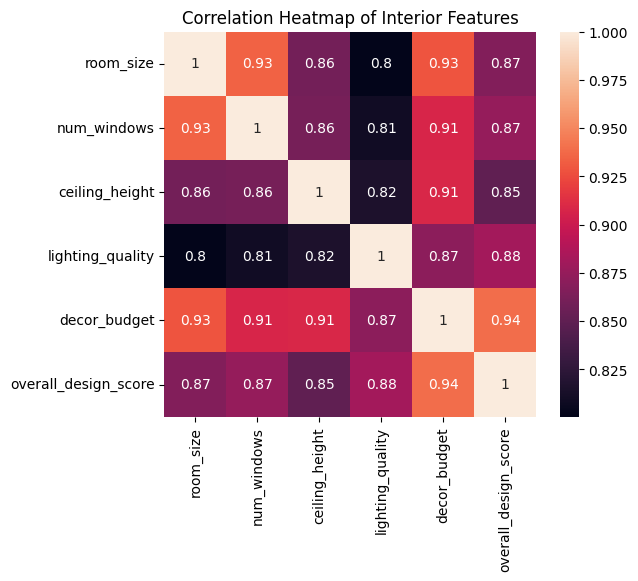

In [97]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 5))
sb.heatmap(new_interior.corr(), annot = True)
plt.title('Correlation Heatmap of Interior Features')

In [ ]:
int.room_type.value_counts()

room_type
Living Room    10
Bedroom         8
Kitchen         8
Dining Room     8
Home Office     8
Bathroom        8
Name: count, dtype: int64

In [103]:
pd.crosstab(int.room_type, columns = 'Frequency')

col_0,Frequency
room_type,
Bathroom,8
Bedroom,8
Dining Room,8
Home Office,8
Kitchen,8
Living Room,10


In [127]:
pd.crosstab(int.room_type, columns = int.furniture_style)


furniture_style,Contemporary,Industrial,Minimalist,Modern,Rustic,Traditional
room_type,,,,,,
Bathroom,0,0,8,0,0,0
Bedroom,0,0,0,0,0,8
Dining Room,0,0,0,0,8,0
Home Office,0,8,0,0,0,0
Kitchen,8,0,0,0,0,0
Living Room,0,0,0,10,0,0


In [125]:
pd.crosstab(int.wall_color, columns = int.furniture_style)

furniture_style,Contemporary,Industrial,Minimalist,Modern,Rustic,Traditional
wall_color,,,,,,
Beige,0,0,0,7,1,0
Dark Blue,0,0,0,0,1,0
Dark Gray,1,0,0,0,1,0
Dark Green,0,0,0,0,2,0
Gray,0,0,0,0,2,0
Green,0,1,0,0,0,0
Light Blue,0,0,1,1,0,1
Light Brown,1,0,0,0,0,0
Light Gray,2,0,0,1,0,1
